In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [89]:
df = pd.read_csv("V_Multiple_InfoStructurale/blosum.csv")
df.columns

Index(['seqName', 'SPS', 'time', 'iter', 'enf_mixte', 'vrac_mixte',
       'helice_mixte', 'struct_mixte', 'enf_propre', 'struct_propre',
       'helice_propre', 'openGap', 'extendGap'],
      dtype='object')

In [90]:
seqNames = df.seqName.unique()
seqNames

array(['BB11001', 'BB11002', 'BB11003', 'BB11004', 'BB11008', 'BB11009',
       'BB11010'], dtype=object)

In [91]:
df = df[df["seqName"] != "BB11001"]
seqNames = seqNames[1:]

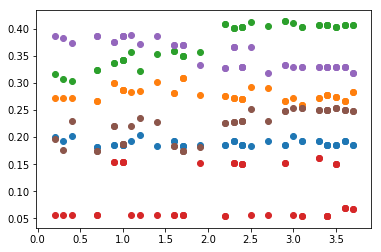

In [87]:
for s in seqNames:
    plt.scatter(df[df["seqName"] == s]["enf_mixte"], df[df["seqName"] == s]["SPS"])

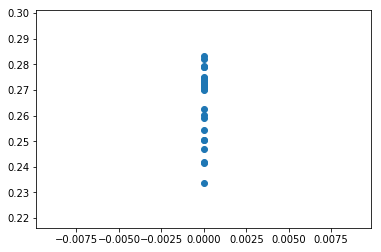

,SPS,time,enf_mixte,vrac_mixte,helice_mixte,struct_mixte,enf_propre,struct_propre,helice_propre,openGap,extendGap
iter,,,,,,,,,,,
5,0.283372,23.526248,0.0,2.0,4.0,1.0,0.0,0.0,4.0,14.3,2.9


In [92]:
dfm = df.groupby("iter").mean()
plt.scatter(dfm["enf_mixte"], dfm["SPS"])
plt.show()
dfm[dfm["SPS"] == max(dfm["SPS"])]

In [68]:
dfm

,SPS,time,enf_mixte,vrac_mixte,helice_mixte,struct_mixte,enf_propre,struct_propre,helice_propre,openGap,extendGap
iter,,,,,,,,,,,
0,0.336821,20.648783,0.0,2.0,4.0,1.0,0.0,0.0,4.0,12.1,1.7
1,0.375119,20.445389,0.0,2.0,4.0,1.0,0.0,0.0,4.0,15.0,2.1
2,0.372604,20.890440,0.0,2.0,4.0,1.0,0.0,0.0,4.0,16.1,2.7
3,0.365836,21.764609,0.0,2.0,4.0,1.0,0.0,0.0,4.0,17.9,2.9
4,0.340439,20.036164,0.0,2.0,4.0,1.0,0.0,0.0,4.0,14.7,1.6
5,0.376283,20.339103,0.0,2.0,4.0,1.0,0.0,0.0,4.0,14.3,2.9
6,0.351291,20.267491,0.0,2.0,4.0,1.0,0.0,0.0,4.0,16.8,1.4
7,0.348003,20.347272,0.0,2.0,4.0,1.0,0.0,0.0,4.0,15.3,1.7
8,0.333849,20.187282,0.0,2.0,4.0,1.0,0.0,0.0,4.0,17.5,1.7
